<a href="https://colab.research.google.com/github/lekhana1/Machine-Learning/blob/master/INCEPTION_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!gsutil -m cp -r gs://proobj/t*.zip .

Copying gs://proobj/test.zip...
Copying gs://proobj/train.zip...
- [2/2 files][  1.7 GiB/  1.7 GiB] 100% Done  40.8 MiB/s ETA 00:00:00           
Operation completed over 2 objects/1.7 GiB.                                      


In [0]:
!unzip train.zip

Archive:  train.zip
   creating: train/
   creating: train/Fat Hen/
  inflating: train/Fat Hen/5bdfa3a44.png  
  inflating: train/Fat Hen/a86b9c0cd.png  
  inflating: train/Fat Hen/f3f6559bf.png  
  inflating: train/Fat Hen/946b48f62.png  
  inflating: train/Fat Hen/4d7fd4020.png  
  inflating: train/Fat Hen/2509e5bc5.png  
  inflating: train/Fat Hen/e2462573b.png  
  inflating: train/Fat Hen/7e98e4aa6.png  
  inflating: train/Fat Hen/075cb6666.png  
  inflating: train/Fat Hen/b43d0a350.png  
  inflating: train/Fat Hen/afac20b21.png  
  inflating: train/Fat Hen/4d2efbb45.png  
  inflating: train/Fat Hen/f0923dcd6.png  
  inflating: train/Fat Hen/180f41d53.png  
  inflating: train/Fat Hen/bfdeafadd.png  
  inflating: train/Fat Hen/ac6625b0f.png  
  inflating: train/Fat Hen/ba5c8f87f.png  
  inflating: train/Fat Hen/e7d278e0e.png  
  inflating: train/Fat Hen/efaab2370.png  
  inflating: train/Fat Hen/9d4722e74.png  
  inflating: train/Fat Hen/4e2f543a2.png  
  inflating: train/Fat Hen/53

In [0]:
!unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: test/c0461776c.png      
  inflating: test/4bbfd1e05.png      
  inflating: test/1d0cbd819.png      
  inflating: test/93079d970.png      
  inflating: test/856f2910a.png      
  inflating: test/976e4e079.png      
  inflating: test/b31292706.png      
  inflating: test/29bab7cad.png      
  inflating: test/37297a64c.png      
  inflating: test/f2dc546ca.png      
  inflating: test/b6a3f7876.png      
  inflating: test/8874bba69.png      
  inflating: test/1459e96a0.png      
  inflating: test/9a3f20121.png      
  inflating: test/5315c2dca.png      
  inflating: test/b7a7f6390.png      
  inflating: test/20e562fd5.png      
  inflating: test/e3f50adfc.png      
  inflating: test/6ba4ef411.png      
  inflating: test/acdb75e00.png      
  inflating: test/e0ec5b6a1.png      
  inflating: test/219fd68d5.png      
  inflating: test/41f1c3cdb.png      
  inflating: test/8c98a6e9b.png      
  inflating: test/1bf9b94a6.png      
  inflating:

In [0]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [0]:
#LABELLING
Train_DATA_FOLDER= "train"
images = []
classes = []
missing = 0
for class_folder_name in os.listdir(Train_DATA_FOLDER):
    class_folder_path = os.path.join(Train_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
   
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None:
          missing += 1
          continue
        images.append(image_bgr)
       
        classes.append(class_label)

In [0]:
#RESIZING IMAGES
def resize_images(img):
  img = np.array(img).astype(np.uint8)
  res = cv2.resize(img,(224,224), interpolation = cv2.INTER_CUBIC)
  return res

images = [resize_images(img) for img in images]
print("Size of input images:",images[0].shape)

Size of input images: (224, 224, 3)


In [0]:
#ONE HOT ENCODING
enc = LabelBinarizer()
y = enc.fit_transform(classes)
y[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [0]:
#SPLITTING TRAIN DATA
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size = 0.2, random_state = 2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

print("Training dataset size:",len(X_train))
print("Validation dataset size:",len(X_val))
print("Test dataset size:",len(X_test))
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

Training dataset size: 3040
Validation dataset size: 760
Test dataset size: 950


In [0]:
#LIBRARIES
import keras
from keras.models import Sequential,Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
img_height,img_width=224,224

In [104]:
#INCEPTION V3 MODEL
model=applications.InceptionV3(weights='imagenet',include_top=False,input_shape=(img_height,img_width,3))
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_507 (Conv2D)             (None, 111, 111, 32) 864         input_24[0][0]                   
__________________________________________________________________________________________________
batch_normalization_494 (BatchN (None, 111, 111, 32) 96          conv2d_507[0][0]                 
__________________________________________________________________________________________________
activation_716 (Activation)     (None, 111, 111, 32) 0           batch_normalization_494[0][0]    
__________________________________________________________________________________________________
conv2d_508

In [105]:
x=model.output
x=Conv2D(512,(3,3),strides=1)(x)
x=BatchNormalization()(x)
x=Dropout(0.5)(x)

x=Flatten()(x)
x = Dense(512, activation='relu')(x)
x= Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x= Dropout(0.5)(x)

predictions = Dense(12, activation='softmax')(x)
model = Model(inputs=model.input, outputs=predictions)


for layer in model.layers[-4:]:
    layer.trainable = True
    
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=["accuracy"])
checkpoint=ModelCheckpoint("inception v3.h5",monitor='val_acc',verbose=1,save_best_only=True,save_weights_only=True,mode='auto',period=1)


history=model.fit(X_train,y_train,
          batch_size=32,
          epochs=20,
          verbose=1, shuffle=True, validation_data=(X_val,y_val),callbacks=[checkpoint])



 


Train on 3040 samples, validate on 760 samples
Epoch 1/20
3040/3040 [==============================] - 60s 20ms/step - loss: 3.5646 - acc: 0.1039 - val_loss: 2.2008 - val_acc: 0.2776

Epoch 00001: val_acc improved from -inf to 0.27763, saving model to inception v3.h5
Epoch 2/20
3040/3040 [==============================] - 29s 10ms/step - loss: 2.8019 - acc: 0.1668 - val_loss: 2.0899 - val_acc: 0.3316

Epoch 00002: val_acc improved from 0.27763 to 0.33158, saving model to inception v3.h5
Epoch 3/20
3040/3040 [==============================] - 30s 10ms/step - loss: 2.4462 - acc: 0.2260 - val_loss: 1.9311 - val_acc: 0.4237

Epoch 00003: val_acc improved from 0.33158 to 0.42368, saving model to inception v3.h5
Epoch 4/20
3040/3040 [==============================] - 30s 10ms/step - loss: 2.1740 - acc: 0.2921 - val_loss: 1.7245 - val_acc: 0.4921

Epoch 00004: val_acc improved from 0.42368 to 0.49211, saving model to inception v3.h5
Epoch 5/20
3040/3040 [==============================] - 30s 

Text(0.5, 1.0, 'Loss Curves')

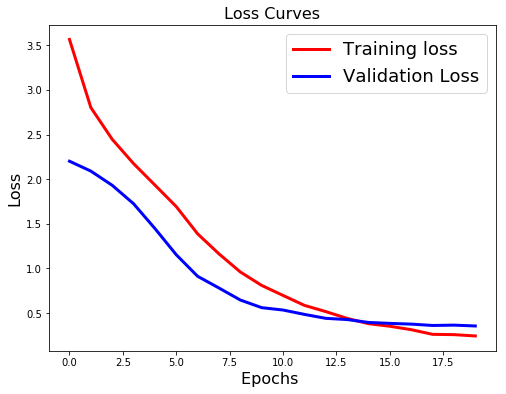

In [106]:
#LossCurves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

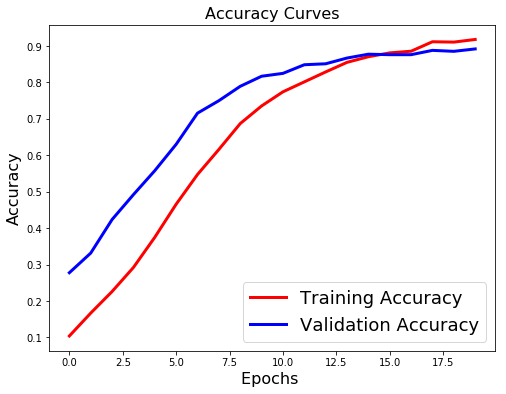

In [107]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [108]:
#PREDICTION

from sklearn.metrics import*
from keras.models import load_model

Y_pred=model.predict(X_test)
y_pred_classes=np.argmax(Y_pred,axis=1)
Y_true=np.argmax(y_test,axis=1)
confusion_max=confusion_matrix(Y_true,y_pred_classes)
print(confusion_max)
print(classification_report(y_pred_classes,Y_true))

[[ 24   0   0   0   4   1  16   0   0   0   0   0]
 [  0  75   0   1   0   0   0   0   0   0   1   0]
 [  0   3  55   1   0   2   0   0   0   0   0   3]
 [  0   0   1 113   0   0   1   0   0   1   1   0]
 [  3   0   0   0  41   0   0   2   0   0   0   0]
 [  0   0   0   1   3  89   1   0   1   0   0   4]
 [ 29   0   0   0   2   0  99   0   0   0   0   0]
 [  0   0   0   0   0   1   0  47   0   0   0   1]
 [  1   1   0   1   0   0   1   0  97   1   0   0]
 [  0   0   0   4   0   0   1   0  10  38   0   0]
 [  0   0   0   0   0   0   0   1   0   0  80   0]
 [  0   2   0   0   0   2   0   1   1   0   0  81]]
              precision    recall  f1-score   support

           0       0.53      0.42      0.47        57
           1       0.97      0.93      0.95        81
           2       0.86      0.98      0.92        56
           3       0.97      0.93      0.95       121
           4       0.89      0.82      0.85        50
           5       0.90      0.94      0.92        95
        